In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

# Training data sets

In [2]:
trainangles_pdg = np.load('trainangles_t.npy', allow_pickle = True)
trainenergy_pdg = np.load('trainenergy_t.npy', allow_pickle = True)
trainbinfrac_pdg = np.load('trainbinfrac_t.npy', allow_pickle = True)
trainrsq_pdg = np.load('trainrsq_t.npy', allow_pickle = True)
pdg2_train = np.load('pdg2_train.npy')

In [3]:
x_train = np.array(list(zip(trainangles_pdg, trainbinfrac_pdg, trainenergy_pdg, trainrsq_pdg)))

In [4]:
y_train = pdg2_train# Create and train BDT

# Create and train BDT

In [5]:
base = DecisionTreeClassifier(max_depth=5)
bdt = AdaBoostClassifier(base_estimator=base, n_estimators=200, random_state=0)
bdt.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=200, random_state=0)

In [6]:
bdt.score(x_train, y_train)

0.717175829908516

In [7]:
y_train

array([  13, 2212, 2212, ...,   13,   13, 2212])

In [8]:
fourcat_pred_train = bdt.predict(x_train)
np.save('fourcat_pred_train.npy', fourcat_pred_train)

# Testing data sets

In [9]:
testangles = np.load('testangles_t.npy', allow_pickle = True)
testenergy = np.load('testenergy_t.npy', allow_pickle = True)
testbinfrac = np.load('testbinfrac_t.npy', allow_pickle = True)
testrsq = np.load('testrsq_t.npy', allow_pickle = True)
pdg2_test = np.load('pdg2_test.npy', allow_pickle = True)

In [10]:
x_test = np.array(list(zip(testangles, testbinfrac, testenergy, testrsq)))

In [11]:
y_test = pdg2_test

# Create and test BDT

In [12]:
base = DecisionTreeClassifier(max_depth=5)
bdt = AdaBoostClassifier(base_estimator=base, n_estimators=200, random_state=0)
bdt.fit(x_test, y_test)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=200, random_state=0)

In [13]:
bdt.score(x_test, y_test)

0.7013656826521734

In [14]:
fourcat_pred_test = bdt.predict(x_test)
np.save('fourcat_pred_test.npy', fourcat_pred_test)

# BDT training score

In [15]:
pionid = np.where(pdg2_train == 211)[0]
muonid = np.where(pdg2_train == 13)[0]
protonid = np.where(pdg2_train == 2212)[0]
otherid = np.where(pdg2_train == 0)[0]

In [16]:
bdt.classes_

array([   0,   13,  211, 2212])

In [17]:
f_train = bdt.decision_function(x_train)

In [18]:
#Score given to each class, 
#BDT attempts to assign the maximum possible value to one of the classes
#according to which class it thinks it belongs to.
#First PFO is classified as a muon, which is indice 1 so this has the highest score.
f_train[1]

array([-0.02622489,  0.01179676, -0.00975065,  0.02417878])

# Other decision function

In [19]:
f_other = f_train[:,0]

In [20]:
print(f_other.max())
print(f_other.min())

1.0499925464621414
-6.92780372120263


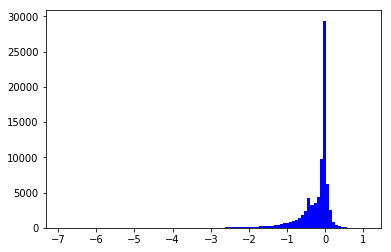

In [21]:
plt.hist(f_other, 100, color = 'blue')
plt.show()

# Muon decision function

In [22]:
f_muon = f_train[:,1]

In [23]:
print(f_muon.max())
print(f_muon.min())

3.0550229631289927
-1.3374488470683112


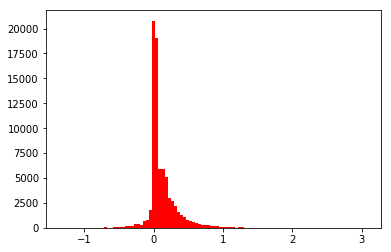

In [24]:
plt.hist(f_muon, 100, color = 'r')
plt.show()

# Pion decision function

In [25]:
f_pion= f_train[:,2]

In [26]:
print(f_pion.max())
print(f_pion.min())

1.623722703747324
-1.8466162626158462


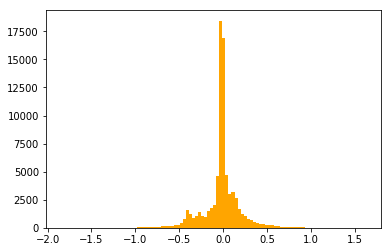

In [27]:
plt.hist(f_pion, 100, color = 'orange')
plt.show()

# Proton decision function

In [28]:
f_proton = f_train[:,3]

In [29]:
print(f_proton.max())
print(f_proton.min())

2.7984209590439253
-0.9415415991166678


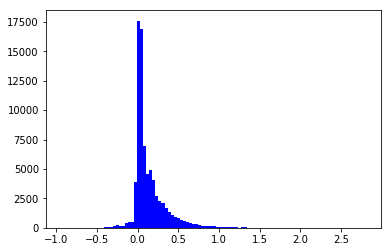

In [30]:
plt.hist(f_proton, 100, color = 'blue')
plt.show()

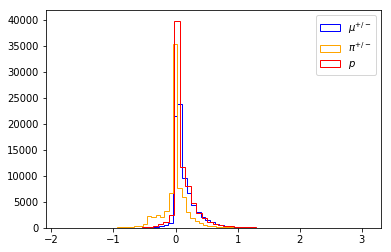

In [31]:
plt.figure()
plt.hist(f_proton, 50, color = 'blue', histtype = u'step', label = r'$\mu^{+/-}$')
plt.hist(f_pion, 50,color = 'orange', histtype = u'step', label = r'$\pi^{+/-}$')
plt.hist(f_muon, 50, color = 'r', histtype = u'step', label = r'$p$')
#plt.hist(f_other, 50, color = 'k', histtype = u'step')
plt.legend()
plt.show()

In [32]:
highest_index_list = []

for i in range(len(f_train)):
    highest_index_list.append(np.argmax(f_train[i]))

In [33]:
highest_index = np.array(highest_index_list)

In [34]:
highest_index

array([1, 3, 3, ..., 1, 1, 1], dtype=int64)

In [35]:
bdt.classes_[highest_index]

array([  13, 2212, 2212, ...,   13,   13,   13])

In [36]:
len(np.where(bdt.classes_[highest_index] == bdt.predict(x_train))[0])

78593

In [37]:
bdt.predict(x_train)

array([  13, 2212, 2212, ...,   13,   13,   13])